**Estimating the flaps configuration required to achieve the required $C_{L max}$**

To be done
- correct 2D lift increase for low $Re$ : *cf* 2022 IAC ISAE-SUPAERO paper...

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from input import *

- Input data

In [18]:
# flap chord fraction range
#w_flaps_chord = np.linspace(0.2, 0.3, 3)
w_flaps_chord_fraction = 0.25

# 2D lift increase for plain flaps and slotted flaps
flaps_Delta_C_l_max_plain = 0.5
flaps_Delta_C_l_max_slotted = 1.2


- Sizing

In [19]:
# WING
w_C_L_max_clean = 0.9*w_C_l_max_clean # for zero sweep angle

# targeted wing lift increase
w_Delta_C_L_max_target = w_C_L_max_target - w_C_L_max_clean

# required flapped area
w_S_flapped_plain = w_S * w_Delta_C_L_max_target / 0.9 / flaps_Delta_C_l_max_plain
w_S_flapped_slotted = w_S * w_Delta_C_L_max_target / 0.9 / flaps_Delta_C_l_max_slotted

w_flaps_inboard_station = fus_width/2
w_flaps_outboard_station_plain = fus_width/2 + w_S_flapped_plain/w_chord/2
w_flaps_outboard_station_slotted = fus_width/2 + w_S_flapped_slotted/w_chord/2

w_flaps_span_stations_plain = [2*y/w_span for y in [w_flaps_inboard_station, w_flaps_outboard_station_plain]]
w_flaps_span_stations_slotted = [2*y/w_span for y in [w_flaps_inboard_station, w_flaps_outboard_station_slotted]]

- Output

In [20]:
print("Plain flaps :   from root to", '{:.1f}'.format(100*w_flaps_span_stations_plain[1]), "% of the wing span")
print("Slotted flaps : from root to", '{:.1f}'.format(100*w_flaps_span_stations_slotted[1]), "% of the wing span")


Plain flaps :   from root to 92.7 % of the wing span
Slotted flaps : from root to 42.1 % of the wing span


- Plotting the wing geometry

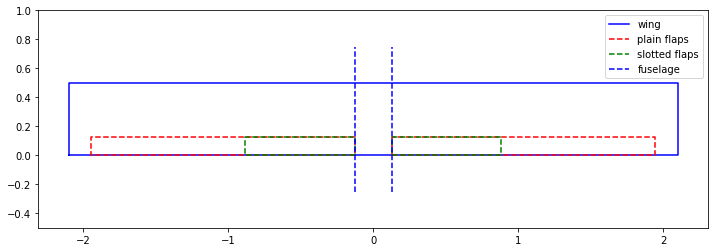

In [21]:
fig = plt.figure(figsize=(12,4))
def plot_wing():
    x_wing = [-w_span/2, w_span/2, w_span/2, -w_span/2, -w_span/2]
    y_wing = [0, 0, w_chord, w_chord, 0]

    x_flaps_plain = [fus_width/2, w_span/2*w_flaps_span_stations_plain[1], \
        w_span/2*w_flaps_span_stations_plain[1], fus_width/2, fus_width/2]
    y_flaps_plain = [0, 0, w_flaps_chord_fraction*w_chord, w_flaps_chord_fraction*w_chord, 0]

    x_flaps_slotted = [fus_width/2, w_span/2*w_flaps_span_stations_slotted[1], \
        w_span/2*w_flaps_span_stations_slotted[1], fus_width/2, fus_width/2]
    y_flaps_slotted = [0, 0, w_flaps_chord_fraction*w_chord, w_flaps_chord_fraction*w_chord, 0]


    plt.plot(x_wing, y_wing, 'b-', label='wing')

    plt.plot(x_flaps_plain, y_flaps_plain, 'r--', label='plain flaps')
    plt.plot([-x for x in x_flaps_plain], y_flaps_plain, 'r--')

    plt.plot(x_flaps_slotted, y_flaps_slotted, 'g--', label='slotted flaps')
    plt.plot([-x for x in x_flaps_slotted], y_flaps_slotted, 'g--')


    plt.plot([fus_width/2, fus_width/2], [-0.5*w_chord, 1.5*w_chord], 'b--', label='fuselage')
    plt.plot([-fus_width/2, -fus_width/2], [-0.5*w_chord, 1.5*w_chord], 'b--')

    plt.axis('equal')
    plt.legend()
    plt.show()

plot_wing()
